# Dummy Variables

## Learning Objectives

### Core

- Know the difference between numerical and categorical predictors
- Use `pd.get_dummies` to transform categorical variables into numerical format
- Know about redundant variables

### Target

- Fit a regression model using both numerical and categorical predictors
- Interpret the model coefficients of categorical predictor variables


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li></ul></li><li><span><a href="#Categorical-predictors" data-toc-modified-id="Categorical-predictors-2">Categorical predictors</a></span></li><li><span><a href="#Example-for-dummifying" data-toc-modified-id="Example-for-dummifying-3">Example for dummifying</a></span><ul class="toc-item"><li><span><a href="#Seaborn-tips-data" data-toc-modified-id="Seaborn-tips-data-3.1">Seaborn tips data</a></span></li><li><span><a href="#Dummify-one-column" data-toc-modified-id="Dummify-one-column-3.2">Dummify one column</a></span></li><li><span><a href="#Dummify-all-variables" data-toc-modified-id="Dummify-all-variables-3.3">Dummify all variables</a></span><ul class="toc-item"><li><span><a href="#Redundant-variables" data-toc-modified-id="Redundant-variables-3.3.1">Redundant variables</a></span></li></ul></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-3.4">Fit the model</a></span><ul class="toc-item"><li><span><a href="#Choose-outcome-and-predictor-variables" data-toc-modified-id="Choose-outcome-and-predictor-variables-3.4.1">Choose outcome and predictor variables</a></span></li><li><span><a href="#Create-train-test-split" data-toc-modified-id="Create-train-test-split-3.4.2">Create train-test split</a></span></li><li><span><a href="#Rescale-the-variables" data-toc-modified-id="Rescale-the-variables-3.4.3">Rescale the variables</a></span></li><li><span><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-3.4.4">Linear regression model</a></span></li><li><span><a href="#Lasso-model" data-toc-modified-id="Lasso-model-3.4.5">Lasso model</a></span></li></ul></li><li><span><a href="#Drop-redundant-variables" data-toc-modified-id="Drop-redundant-variables-3.5">Drop redundant variables</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-3.6">Fit the model</a></span><ul class="toc-item"><li><span><a href="#Create-train-test-split" data-toc-modified-id="Create-train-test-split-3.6.1">Create train-test split</a></span></li><li><span><a href="#Rescale-the-variables" data-toc-modified-id="Rescale-the-variables-3.6.2">Rescale the variables</a></span></li><li><span><a href="#Linear-regression-model" data-toc-modified-id="Linear-regression-model-3.6.3">Linear regression model</a></span></li><li><span><a href="#Lasso-model" data-toc-modified-id="Lasso-model-3.6.4">Lasso model</a></span></li></ul></li><li><span><a href="#Interpret-the-model-coefficients-of-dummy-variables" data-toc-modified-id="Interpret-the-model-coefficients-of-dummy-variables-3.7">Interpret the model coefficients of dummy variables</a></span></li></ul></li><li><span><a href="#Dummy-practice" data-toc-modified-id="Dummy-practice-4">Dummy practice</a></span><ul class="toc-item"><li><span><a href="#Chose-columns-for-dummifying" data-toc-modified-id="Chose-columns-for-dummifying-4.1">Chose columns for dummifying</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-4.2">Fit the model</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Categorical predictors

You may note that in our examples so far our independent variable $X$ is quantitative. This need not be the case. In many cases, we'll use qualitative variables to explain quantitative outcomes. Some examples:

- One's sex and education are often linked to income.
- The day of the week might explain a bar's profits or the month of the year might affect an airlines' revenues.
- Whether or not someone has children above 5 might help to predict when he will go on holiday.

If you have a variable that is categorical, you will need to "dummy code" it:
- Check out [a worked out example](https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/) 
- and/or [the Pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html) to see this implemented in Python.

Practically, dummy variables come into play more in **multiple linear regression** (MLR), but it can technically apply to SLR and it's something of which you should be aware of.

The following dataset contains categorical variables. 

- Pick one of the categorical variables, for example `sex`.
- Use `pd.get_dummies` to create a dummy variable.
- Fit `tips` on one of the resulting dummy variables (for example `Male`).
- How do you interpret the regression coefficients?

## Example for dummifying

### Seaborn tips data

In [8]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


We want to predict the amount of tip given the other quantities. Correlations can only be calculated between the numerical variables.

In [9]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Dummify one column

To make use of the categorical variables, we have to dummify them. We use panda's `pd.get_dummies` function.

We can apply it to a choice of columns, for example `sex`.

In [10]:
tips_temp = pd.get_dummies(tips,columns=['sex'])
tips_temp.head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


Of course the columns for male and female are completely anticorrelated.

In [11]:
tips_temp[['sex_Male','sex_Female']].corr()

,sex_Male,sex_Female
sex_Male,1.0,-1.0
sex_Female,-1.0,1.0


### Dummify all variables

We can also simply apply `pd.get_dummies` to the whole dataframe. All object type columns will be transformed. If the categories in a column are coded numerically (like 1, 2, 3) it will be necessary to tell pandas to transform that column by indicating it explicitly.

In [12]:
tips_dum = pd.get_dummies(tips)
tips_dum.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [13]:
# statsmodel or linearregression

#### Redundant variables

> For binary variables we see the anticorrelations in the heatmap (not being smoker implies being non-smoker). 

> For variables with more than two categories, we know that we have one category if it is not in any of the remaining categories. For example, if the entry for days from Monday to Saturday is zero, we know that we have Sunday. That is not reflected in pairwise correlation, but still we have a variable which is redundant.

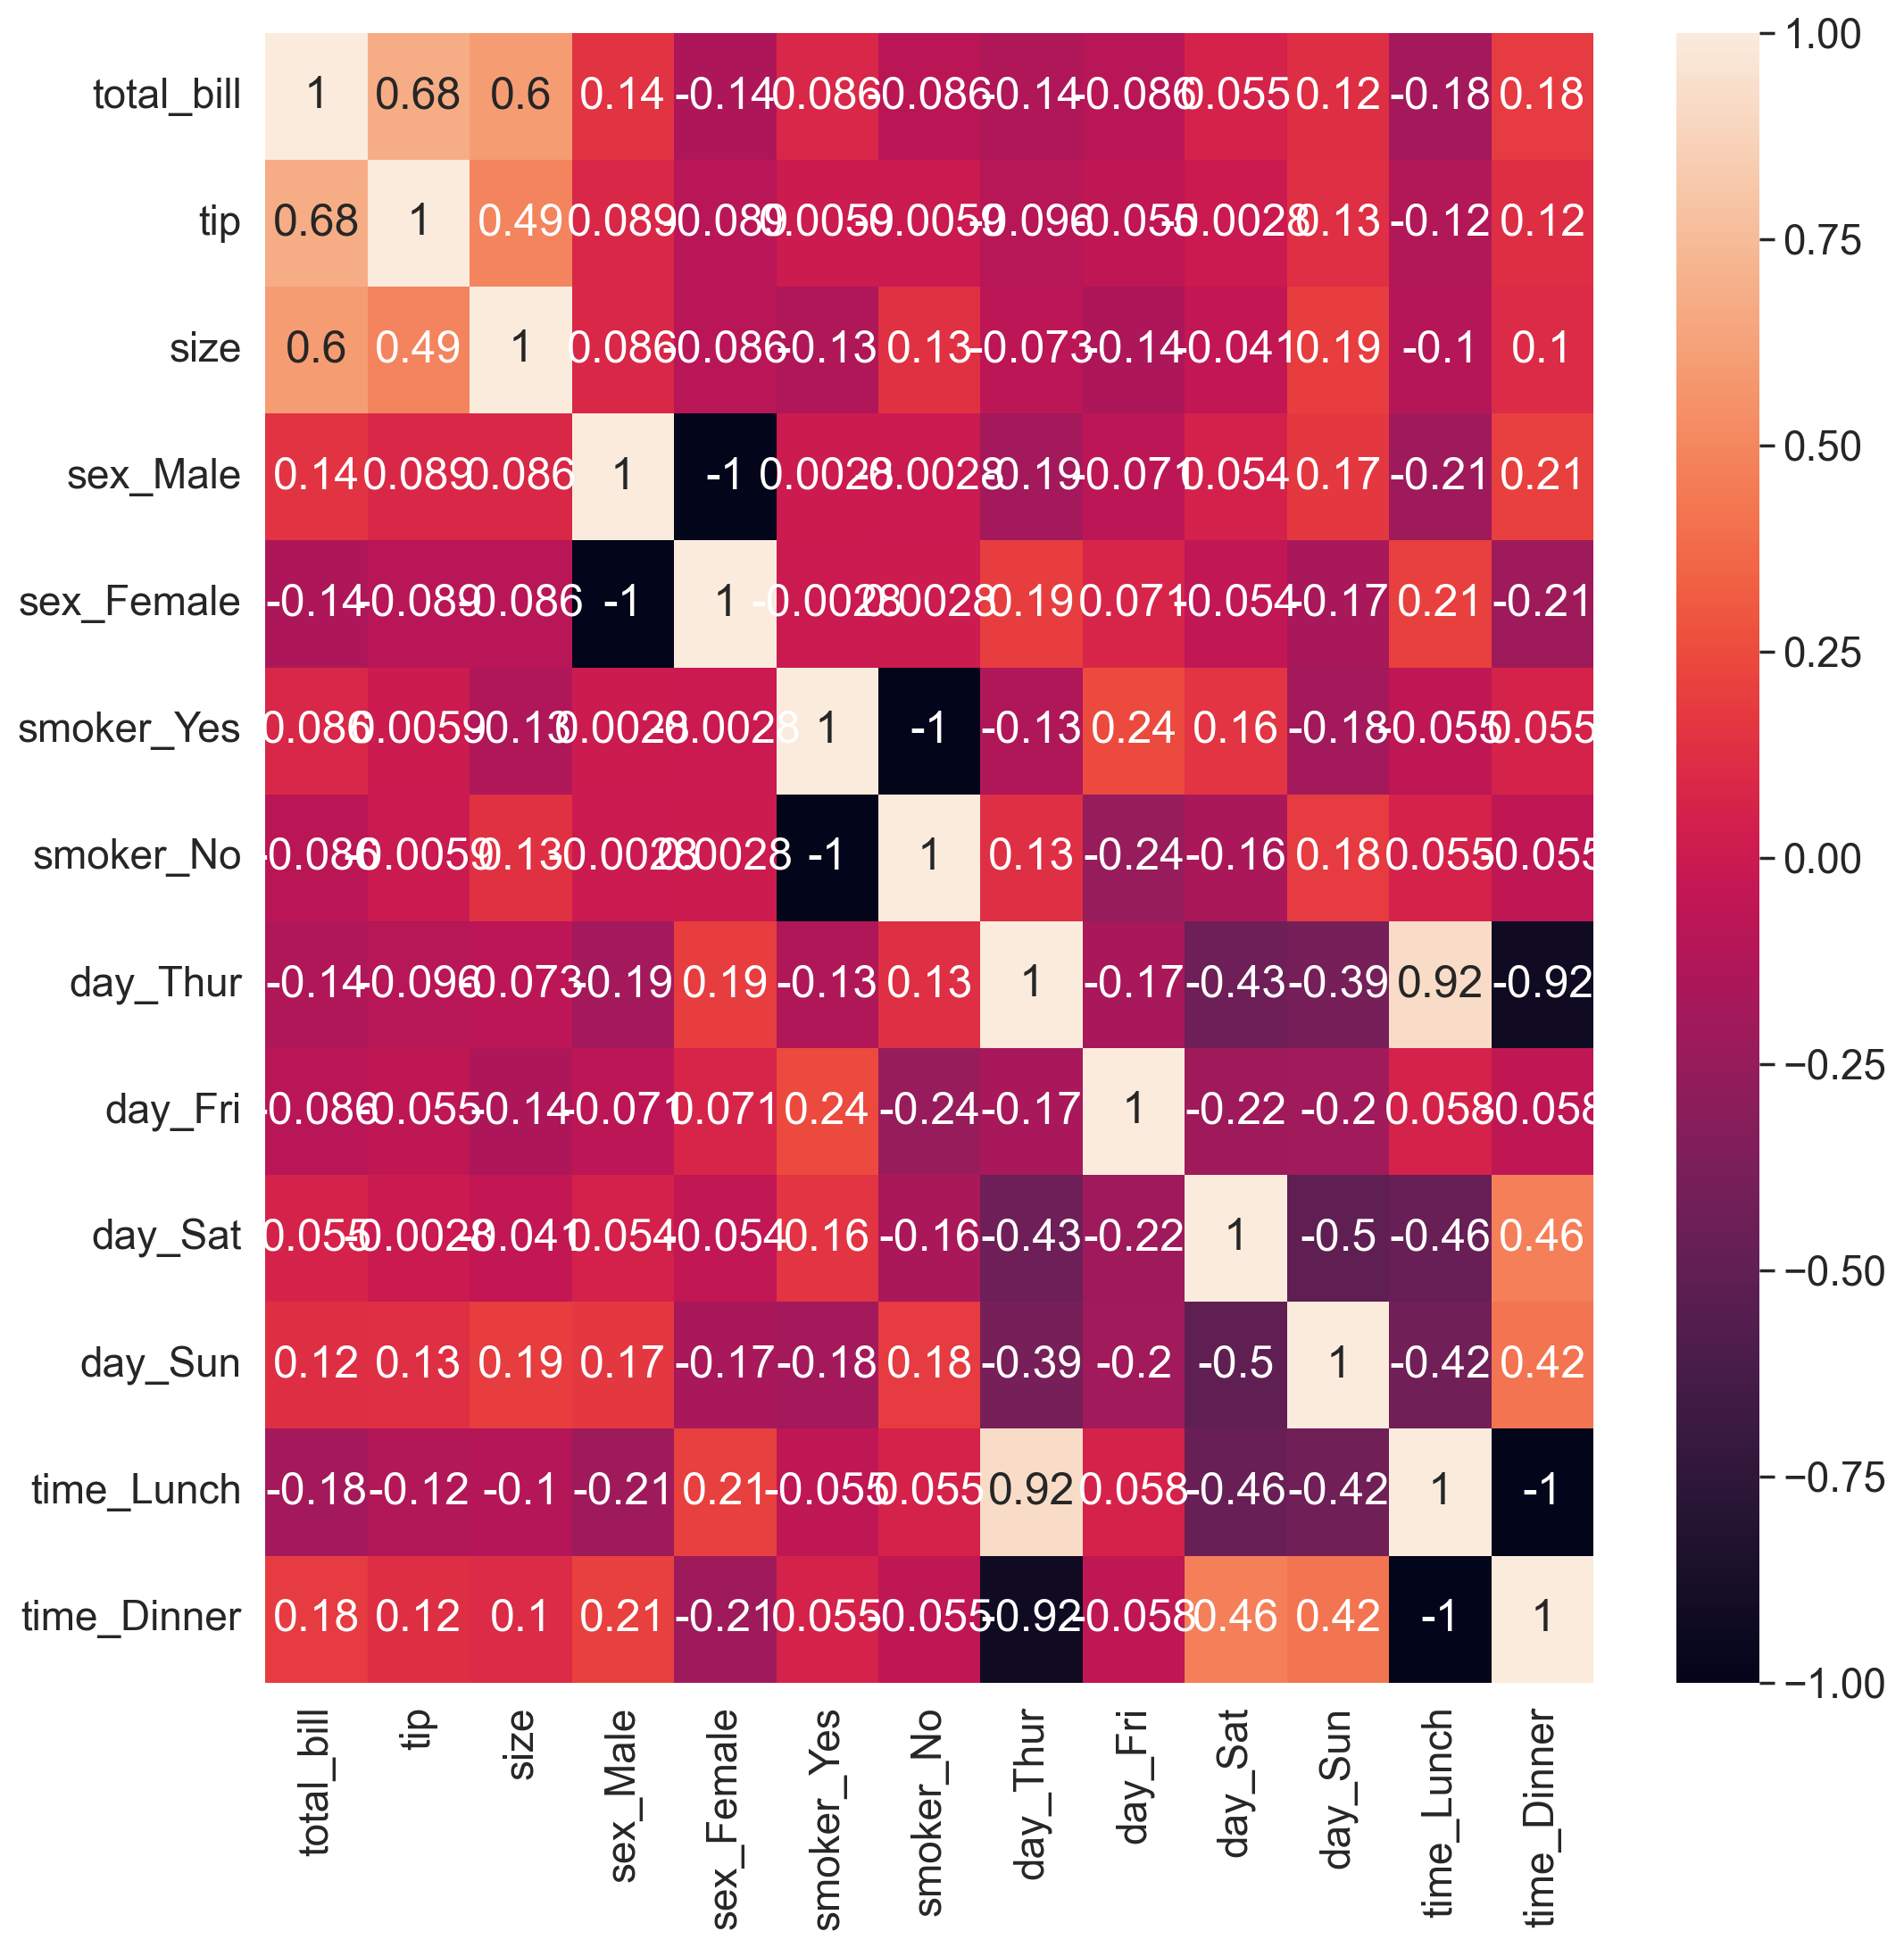

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(tips_dum.corr(),annot=True,ax=ax)
plt.show()

In [15]:
tips_dum = pd.get_dummies(tips)
tips_dum.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [16]:
################################## We will come back later to finish the code for the modelling ################################

### Fit the model

Now we fit the model. We use rescaling to be able to apply regularized regression. Rescaling can be applied to dummified variables. The result will be that the possible values 0 and 1 are translated into one positive and one negative number.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# statsmodel

#### Choose outcome and predictor variables

In [18]:
y = tips_dum.pop('tip')
X = tips_dum

#### Create train-test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#### Rescale the variables

> Note that while we use `.fit_transform` on the training data,
we only use `.transform` on the test data. This reflects that we cannot rescale with the mean and standard deviation of data which we have not seen before.

In [20]:
# scaler = StandardScaler()

scaler = MinMaxScaler()

In [21]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns) # to get the model
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

#### Linear regression model

In [22]:
model = LinearRegression( fit_intercept=True)
model.fit(X_train,y_train)

print(model.score(X_train,y_train)) # 80%
print(model.score(X_test,y_test)) # 20%

# R2 score can be negative.
# its negative value denotes that the regression line is not following the trend of the data, in other words, 
# it means that the model is not good.

0.4415940189777391
0.4875817254349355


In [23]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 1.532980644142658


,0,1
0,total_bill,3.459082
1,size,1.200322
2,sex_Male,-0.024538
3,sex_Female,0.024538
4,smoker_Yes,-0.075581
5,smoker_No,0.075581
6,day_Thur,-0.304791
7,day_Fri,0.115098
8,day_Sat,0.107599
9,day_Sun,0.082094


In [24]:
################################################################################################################################

#### Lasso model

If we do not drop the redundant columns, the Lasso reduces them to zero even with mild regularization strength. Usually it is much better to avoid having redundant variables (you would not have very much control which one is driven to zero and it can lead to many further problems).

In [26]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=10**(-6),max_iter=100000)
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.44159401880328775
0.48758552822133505


In [27]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 1.497141659014086


,0,1
0,total_bill,3.459057e+00
1,size,1.200306e+00
2,sex_Male,-4.907190e-02
3,sex_Female,3.943007e-17
4,smoker_Yes,-1.511537e-01
5,smoker_No,0.000000e+00
6,day_Thur,-3.964122e-01
7,day_Fri,2.336694e-02
8,day_Sat,1.584753e-02
9,day_Sun,-9.648339e-03


### Drop redundant variables

We can avoid having redundant variables by indicating `drop_first=True`.
This is really important because otherwise we might end up with 
problems in our regression models.

In [28]:
tips_dum = pd.get_dummies(tips,drop_first=True)
tips_dum.head()
y = tips_dum.pop('tip')
X = tips_dum
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


### Fit the model

#### Create train-test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#### Rescale the variables

> Note that while we use `.fit_transform` on the training data,
we only use `.transform` on the test data. This reflects that we cannot rescale with the mean and standard deviation of data which we have not seen before.

In [30]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

#### Linear regression model

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.4415940189777391
0.48758172543493516


In [32]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 1.3557842271581007


,0,1
0,total_bill,3.459082
1,size,1.200322
2,sex_Female,0.049075
3,smoker_No,0.151163
4,day_Fri,0.419888
5,day_Sat,0.412390
6,day_Sun,0.386885
7,time_Dinner,-0.455427


#### Lasso model

In [33]:
model = Lasso(alpha=10**(-3),max_iter=100000)
model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.4409533746157639
0.49374075113973603


In [34]:
print('Intercept:',model.intercept_)
pd.DataFrame(list(zip(X_train.columns,model.coef_)))

Intercept: 1.385994220598623


,0,1
0,total_bill,3.430983
1,size,1.187267
2,sex_Female,0.046006
3,smoker_No,0.142591
4,day_Fri,0.205734
5,day_Sat,0.133697
6,day_Sun,0.111390
7,time_Dinner,-0.191038


### Interpret the model coefficients of dummy variables

The model coefficients of categorical predictors can be interpreted in the following way.

Our model will contain a contribution to the outcome variable like

$$
\beta_{\rm smoker\_No}\ x_{\rm smoker\_no} \approx 0.07\ x_{\rm smoker\_no}
$$

We can have either $x_{\rm smoker\_no}=0$ or $x_{\rm smoker\_no}=1$. Only in the second case there will be a contribution. 

> The tip, i.e. the outcome variable $y$, will be 0.07 $ higher for non-smokers than for smokers.

## Dummy practice

Now practice dummifying on the autostats dataset.

- Decide which columns should be dummified.
- Use continuous as well as dummified variables to predict `mpg` with linear regression or the Lasso.
- Don't forget to remove missing values (which might not be encoded properly as `NaN`.
- It won't make sense to create as many dummy variables as observations. 
    - Rather try to create categories, for example the car brand. 
    - Note that there are some spelling mistakes in the car brand names. 
    - To extract the brand names, remember the `.map` function, the `.split` function for strings and panda's `.replace` function to replace entries in a dataframe column.

In [35]:
df = pd.read_csv('Auto.csv')

In [36]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Chose columns for dummifying

In [37]:
df.cylinders.value_counts()

4    203
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [38]:
df.origin.value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

In [39]:
# Extract brands
replace_dict = {'chevroelt':'chevrolet',
                'chevy':'chevrolet',
                'mercedes-benz':'mercedes',
                'toyouta':'toyota',
                'maxda':'mazda',
               'vw':'volkswagen',
               'vokswagen':'volkswagen'}
df['name'] = df.name.map(lambda x: x.split(' ')[0]).replace(replace_dict)

In [40]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford


In [41]:
# Dummify
df = pd.get_dummies(df,columns=['cylinders','name','origin'],drop_first=True)

In [42]:
# drop missing values
df.replace({'?':np.nan},inplace=True)

In [43]:
df.dropna(inplace=True)

In [44]:
df.shape

(392, 41)

### Fit the model

In [45]:
X = df.copy()
y = X.pop('mpg')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

model = LinearRegression()
model.fit(X_train,y_train)
print(model.coef_, model.intercept_)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

[  4.69379721  -6.85436426 -20.11821721   0.57063878   8.34491049
   8.68384588   9.72099656   5.90070747   8.70576147  -0.46667452
  -4.71825973   1.29081036   2.66578549   0.32487557   0.27981542
  -1.58721319   0.99933669   0.46425659   1.2745191   -0.38369046
   2.44349996   0.28743885   2.04997788   1.12996424  -0.12941596
   1.89659653   0.32718324  -1.36147369   0.62103768   2.1716759
   2.71870619   1.04326448  -0.16616793  -1.25321513  -0.96681449
   5.21291491   0.4596808   -1.04686726   1.98193809   3.01332035] 17.905288164735246
0.8659471823108127
0.8292478712854101


In [47]:
model = Lasso(alpha=10**(-3),max_iter=100000)
model.fit(X_train,y_train)
print(pd.DataFrame(list(zip(X_train.columns,np.around(model.coef_,3))))) 
print(model.intercept_)
print()
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

                  0       1
0      displacement   4.302
1        horsepower  -6.732
2            weight -19.737
3      acceleration   0.635
4              year   8.359
5       cylinders_4   8.200
6       cylinders_5   9.056
7       cylinders_6   5.373
8       cylinders_8   8.204
9         name_audi  -0.254
10         name_bmw  -4.301
11       name_buick   1.097
12    name_cadillac   2.350
13       name_capri   0.000
14   name_chevrolet   0.112
15    name_chrysler  -1.640
16      name_datsun   0.672
17       name_dodge   0.279
18        name_fiat   1.365
19        name_ford  -0.541
20          name_hi   1.828
21       name_honda   0.000
22       name_mazda   1.517
23    name_mercedes   1.135
24     name_mercury  -0.248
25      name_nissan   1.294
26  name_oldsmobile   0.123
27        name_opel  -1.132
28     name_peugeot   0.646
29    name_plymouth   2.003
30     name_pontiac   2.531
31     name_renault   1.033
32        name_saab  -0.000
33      name_subaru  -1.478
34      name_toyota 

In [48]:
from sklearn.linear_model import LassoCV

In [49]:
model = LassoCV(n_alphas=20)
model.fit(X_train,y_train)

print(pd.DataFrame(list(zip(X_train.columns,np.around(model.coef_,3))))) 
print()
print(model.alpha_)
print(model.intercept_)
print()
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

                  0       1
0      displacement   3.616
1        horsepower  -6.513
2            weight -19.078
3      acceleration   0.722
4              year   8.374
5       cylinders_4   7.301
6       cylinders_5   7.830
7       cylinders_6   4.419
8       cylinders_8   7.275
9         name_audi  -0.174
10         name_bmw  -3.833
11       name_buick   0.891
12    name_cadillac   1.920
13       name_capri  -0.000
14   name_chevrolet  -0.000
15    name_chrysler  -1.579
16      name_datsun   0.593
17       name_dodge   0.094
18        name_fiat   1.212
19        name_ford  -0.674
20          name_hi   0.852
21       name_honda   0.000
22       name_mazda   1.062
23    name_mercedes   0.835
24     name_mercury  -0.314
25      name_nissan   0.697
26  name_oldsmobile   0.000
27        name_opel  -1.024
28     name_peugeot   0.385
29    name_plymouth   1.844
30     name_pontiac   2.337
31     name_renault   0.694
32        name_saab  -0.000
33      name_subaru  -1.360
34      name_toyota 